<a href="https://colab.research.google.com/github/adeelshahrbc/adeelshahrbc.github.io/blob/master/Assignment_1_Adeel_revised.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menu bar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menu bar, select Cell$\rightarrow$Run All).

Make sure that in addition to the code, you provide written answers for all questions of the assignment. 

Below, please fill in your name:

In [ ]:
NAME = "Syed Adeel Ahmed Shah, you can call me Adeel"

## Assignment 1 - Data Cleaning & Exploration
**(30 points total)**

For this assignment, we will use an open dataset with data on various types of cereal and the corresponding customer ratings. Use the .csv file provided.

Create a dataframe by importing the file into Jupyter, and complete the tasks below. Be sure to show your Python code. You will not be graded on code efficiency, but your code should return a correct answer.

**Question 1.**  _(4 points)_
* Create a new 'Type of Cereal' column in your dataframe (1 point) by copying the 'name' column. Write a function to replace the names of the cereal in your new column with one of these categories Bran, Wheat, Fiber, Protein, Crunch, Corn, Nut, Rice and Other (3 points). Hint: the function should look through the text in the cereal name and determine, based on its contents, how to categorize the cereal type.

**Question 2.**  _(2 points)_
* Identify the negative values in the data set and replace them with the median value for that column. 

**Question 3.** _(5 points)_
* Standardize the 'weight' column to 1. For this question, you will need to write a function to divide the remaining columns which contain nutritional information by the corresponding value in the weight column, and you will need to divide the value in the weight column by itself in order to get 1. For example, if an observation has a weight value of 1.33 and a calories value of 250, if you divide 250/1.33 you should get a calories value of 188 and a weight value of 1. 

**Question 4.**  _(5 points)_
* Create a new column to categorize cereals as 'healthy' vs. 'unhealthy'. You can define your own version of healthy vs. unhealthy, or you can use the following: healthy cereals can be defined as those which have low calories (<100), low sodium (<150), low sugar (<9) high fiber (>3), and high protein (>2). All other cereals are unhealthy.

**Question 5.** _(2 points)_
* Based on your newly prepared data set, identify what % of cereals that each manufacturer produces are healthy.

**Question 6.** _(2 points)_
* Calculate the average, minimum and maximum ratings for healthy vs. unhealthy cereals.

**Question 7.** _(2 points)_
* Calculate the average, minimum and maximum ratings for each type of cereal: Bran, Wheat, Fiber, Protein, Crunch, Corn, Nut, Rice and Other.

**Question 8.** _(3 points)_
* Create a stacked bar chart which shows how many of each type of cereal each manufacturer produces.

**Question 9.** _(3 points)_
* Create a 3-dimensional scatterplot which shows the relationship between rating and calories; the 3-rd dimension should be reflected in the color of the dots and should highlight whether the cereal is categorized as healthy or unhealthy. 

**Question 10.** _(1 point)_
* Which shelf has the most healthy cereals?

**Question 11.** _(1 point)_
* Based on the analysis conducted, what can you conclude about the cereal data set?

In [ ]:
import numpy as np
import pandas as pd
import re
df = pd.read_csv('https://raw.githubusercontent.com/adeelshahrbc/adeelshahrbc.github.io/master/cereal.csv')

df.head()
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      77 non-null     object 
 1   mfr       77 non-null     object 
 2   type      77 non-null     object 
 3   calories  77 non-null     int64  
 4   protein   77 non-null     int64  
 5   fat       77 non-null     int64  
 6   sodium    77 non-null     int64  
 7   fiber     77 non-null     float64
 8   carbo     77 non-null     float64
 9   sugars    77 non-null     int64  
 10  potass    77 non-null     int64  
 11  vitamins  77 non-null     int64  
 12  shelf     77 non-null     int64  
 13  weight    77 non-null     float64
 14  cups      77 non-null     float64
 15  rating    77 non-null     float64
dtypes: float64(5), int64(8), object(3)
memory usage: 9.8+ KB


Question 1. (4 points)

Create a new 'Type of Cereal' column in your dataframe (1 point) by copying the 'name' column. Write a function to replace the names of the cereal in your new column with one of these categories Bran, Wheat, Fiber, Protein, Crunch, Corn, Nut, Rice and Other (3 points). Hint: the function should look through the text in the cereal name and determine, based on its contents, how to categorize the cereal type.

In [ ]:
df

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,G,C,110,2,1,250,0.0,21.0,3,60,25,3,1.0,0.75,39.106174
73,Trix,G,C,110,1,1,140,0.0,13.0,12,25,25,2,1.0,1.00,27.753301
74,Wheat Chex,R,C,100,3,1,230,3.0,17.0,3,115,25,1,1.0,0.67,49.787445
75,Wheaties,G,C,100,3,1,200,3.0,17.0,3,110,25,1,1.0,1.00,51.592193


In [ ]:
df['Type of Cereal']=df['name'].str.extract(r'\b(\w+)$', expand = True)


df

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,Type of Cereal1,Type of Cereal
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973,Bran,Bran
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679,Bran,Bran
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505,Bran,Bran
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912,Bran,Fiber
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843,Bran,Delight
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,G,C,110,2,1,250,0.0,21.0,3,60,25,3,1.0,0.75,39.106174,Bran,Triples
73,Trix,G,C,110,1,1,140,0.0,13.0,12,25,25,2,1.0,1.00,27.753301,Bran,Trix
74,Wheat Chex,R,C,100,3,1,230,3.0,17.0,3,115,25,1,1.0,0.67,49.787445,Bran,Chex
75,Wheaties,G,C,100,3,1,200,3.0,17.0,3,110,25,1,1.0,1.00,51.592193,Bran,Wheaties


In [ ]:
def type_of_cereal(i):

  i = str(i)

  bran = 'Bran'
  wheat = 'Wheat'
  fiber = 'Fiber'
  protein = 'Protein'
  crunch = 'Crunch'
  corn = 'Corn'
  nut = 'Almond'
  rice = 'Rice'
  
  if bran.find(i)!=0:
    return 'Bran'
  elif wheat.find(i)!=0:
    return 'Wheat'
 # elif fiber.search(i)!=None:
 #   return 'Fiber'
 # elif protein.search(i)!=None:
 #   return 'Protein'
 # elif crunch.search(i)!=None:
 #   return 'Crunch'
 # elif corn.search(i)!=None:
 #   return 'Corn'
 # elif nut.search(i)!=None:
 #   return 'Nut'
 # elif rice.search(i)!=None:
 #   return 'Rice'
  else:
    return 'Other'


In [ ]:
df['Type of Cereal1']=df['name'].apply(type_of_cereal)

In [ ]:
df

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,Type of Cereal1
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973,Bran
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679,Bran
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505,Bran
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912,Bran
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843,Bran
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,G,C,110,2,1,250,0.0,21.0,3,60,25,3,1.0,0.75,39.106174,Bran
73,Trix,G,C,110,1,1,140,0.0,13.0,12,25,25,2,1.0,1.00,27.753301,Bran
74,Wheat Chex,R,C,100,3,1,230,3.0,17.0,3,115,25,1,1.0,0.67,49.787445,Bran
75,Wheaties,G,C,100,3,1,200,3.0,17.0,3,110,25,1,1.0,1.00,51.592193,Bran


Identify the negative values in the data set and replace them with the median value for that column.

In [ ]:
df[df['calories'] < 0] = df['calories'].median()
df[df['protein'] < 0] = df['protein'].median()
df[df['fat'] < 0] = df['fat'].median()
df[df['sodium'] < 0] = df['sodium'].median()
df[df['fiber'] < 0] = df['fiber'].median()
df[df['carbo'] < 0] = df['carbo'].median()
df[df['sugars'] < 0] = df['sugars'].median()
df[df['potass'] < 0] = df['potass'].median()
df[df['vitamins'] < 0] = df['vitamins'].median()
df[df['shelf'] < 0] = df['shelf'].median()
df[df['weight'] < 0] = df['weight'].median()
df[df['cups'] < 0] = df['cups'].median()
df[df['rating'] < 0] = df['rating'].median()

Standardize the 'weight' column to 1. 

For this question, you will need to write a function to divide the remaining columns which contain nutritional information by the corresponding value in the weight column, and you will need to divide the value in the weight column by itself in order to get 1.

For example, if an observation has a weight value of 1.33 and a calories value of 250, if you divide 250/1.33 you should get a calories value of 188 and a weight value of 1.

In [ ]:
def fix_weight(x,i):
  return x/i
    

In [ ]:
df['calories'] = fix_weight(df['calories'],df['weight'])


In [ ]:
df['protein'] = fix_weight(df['protein'],df['weight'])
df['fat'] = fix_weight(df['fat'],df['weight'])
df['sodium'] = fix_weight(df['sodium'],df['weight'])
df['fiber'] = fix_weight(df['fiber'],df['weight'])
df['carbo'] = fix_weight(df['carbo'],df['weight'])
df['sugars'] = fix_weight(df['sugars'],df['weight'])
df['potass'] = fix_weight(df['potass'],df['weight'])
df['vitamins'] = fix_weight(df['vitamins'],df['weight'])
df['shelf'] = fix_weight(df['shelf'],df['weight'])

In [ ]:
df['weight']=1

In [ ]:
df

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,Type of Cereal1,Type of Cereal
0,100% Bran,N,C,70.0,4.0,1.0,130.0,10.0,5.0,6.0,280.0,25.0,3.0,2,0.33,68.402973,Bran,Bran
1,100% Natural Bran,Q,C,120.0,3.0,5.0,15.0,2.0,8.0,8.0,135.0,0.0,3.0,2,1.00,33.983679,Bran,Bran
2,All-Bran,K,C,70.0,4.0,1.0,260.0,9.0,7.0,5.0,320.0,25.0,3.0,2,0.33,59.425505,Bran,Bran
3,All-Bran with Extra Fiber,K,C,50.0,4.0,0.0,140.0,14.0,8.0,0.0,330.0,25.0,3.0,2,0.50,93.704912,Bran,Fiber
4,90.0,90.0,90.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2,90.00,90.000000,90.0,90.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,G,C,110.0,2.0,1.0,250.0,0.0,21.0,3.0,60.0,25.0,3.0,2,0.75,39.106174,Bran,Triples
73,Trix,G,C,110.0,1.0,1.0,140.0,0.0,13.0,12.0,25.0,25.0,2.0,2,1.00,27.753301,Bran,Trix
74,Wheat Chex,R,C,100.0,3.0,1.0,230.0,3.0,17.0,3.0,115.0,25.0,1.0,2,0.67,49.787445,Bran,Chex
75,Wheaties,G,C,100.0,3.0,1.0,200.0,3.0,17.0,3.0,110.0,25.0,1.0,2,1.00,51.592193,Bran,Wheaties


Question 4. (5 points)

Create a new column to categorize cereals as 'healthy' vs. 'unhealthy'. 

You can define your own version of healthy vs. unhealthy, or you can use the following: healthy cereals can be defined as those which have 

low calories (<100), 

low sodium (<150), 

low sugar (<9) high fiber (>3), and 

high protein (>2). All other cereals are unhealthy.

In [ ]:
df['Is Healthy'] = df['calories'].apply(lambda x: 'Healthy' if x <= 100 else 'Unhealthy')
df['Is Healthy'] = df['sodium'].apply(lambda x: 'Healthy' if x <= 150 else 'Unhealthy')
df['Is Healthy'] = df['sugars'].apply(lambda x: 'Healthy' if x <= 9 else 'Unhealthy')
df['Is Healthy'] = df['fiber'].apply(lambda x: 'Healthy' if x >= 3 else 'Unhealthy')
df['Is Healthy'] = df['protein'].apply(lambda x: 'Healthy' if x >= 2 else 'Unhealthy')

In [ ]:
df

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,Type of Cereal1,Type of Cereal,Is Healthy
0,100% Bran,N,C,70.0,4.0,1.0,130.0,10.0,5.0,6.0,280.0,25.0,3.0,1,0.33,68.402973,Bran,Bran,Healthy
1,100% Natural Bran,Q,C,120.0,3.0,5.0,15.0,2.0,8.0,8.0,135.0,0.0,3.0,1,1.00,33.983679,Bran,Bran,Healthy
2,All-Bran,K,C,70.0,4.0,1.0,260.0,9.0,7.0,5.0,320.0,25.0,3.0,1,0.33,59.425505,Bran,Bran,Healthy
3,All-Bran with Extra Fiber,K,C,50.0,4.0,0.0,140.0,14.0,8.0,0.0,330.0,25.0,3.0,1,0.50,93.704912,Bran,Fiber,Healthy
4,90.0,90.0,90.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1,90.00,90.000000,90.0,90.0,Unhealthy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,G,C,110.0,2.0,1.0,250.0,0.0,21.0,3.0,60.0,25.0,3.0,1,0.75,39.106174,Bran,Triples,Healthy
73,Trix,G,C,110.0,1.0,1.0,140.0,0.0,13.0,12.0,25.0,25.0,2.0,1,1.00,27.753301,Bran,Trix,Unhealthy
74,Wheat Chex,R,C,100.0,3.0,1.0,230.0,3.0,17.0,3.0,115.0,25.0,1.0,1,0.67,49.787445,Bran,Chex,Healthy
75,Wheaties,G,C,100.0,3.0,1.0,200.0,3.0,17.0,3.0,110.0,25.0,1.0,1,1.00,51.592193,Bran,Wheaties,Healthy


Question 5. (2 points)

Based on your newly prepared data set, identify what % of cereals that each manufacturer produces are healthy.

In [ ]:
df.groupby('Is Healthy').describe()

calories                                                         \
              count        mean        std   min         25%    50%    75%   
Is Healthy                                                                   
Healthy        62.0  102.383259  14.743922  50.0   96.725247  100.0  110.0   
Unhealthy      15.0   90.200000  46.339123   1.0  110.000000  110.0  110.0   

                  protein            ...  cups       rating             \
              max   count      mean  ...   75%   max  count       mean   
Is Healthy                           ...                                 
Healthy     150.0    62.0  2.738638  ...  1.00   1.5   62.0  45.372554   
Unhealthy   120.0    15.0  1.000000  ...  1.23  90.0   15.0  34.427593   

                                                                              
                  std        min        25%        50%        75%        max  
Is Healthy                                                                    
Healthy     13.057491  26.734515  36.484555  40.966269  52.867717  93.704912  
Unhealthy   23.624324  14.000000  22.133902  27.753301  33.609382  90.000000  

[2 rows x 104 columns]

In [ ]:
print(62/77*100)

80.51948051948052


Question 6. (2 points)

Calculate the average, minimum and maximum ratings for healthy vs. unhealthy cereals.

In [ ]:
df

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,Type of Cereal1,Type of Cereal,Is Healthy
0,100% Bran,N,C,70.0,4.0,1.0,130.0,10.0,5.0,6.0,280.0,25.0,3.0,1,0.33,68.402973,Bran,Bran,Healthy
1,100% Natural Bran,Q,C,120.0,3.0,5.0,15.0,2.0,8.0,8.0,135.0,0.0,3.0,1,1.00,33.983679,Bran,Bran,Healthy
2,All-Bran,K,C,70.0,4.0,1.0,260.0,9.0,7.0,5.0,320.0,25.0,3.0,1,0.33,59.425505,Bran,Bran,Healthy
3,All-Bran with Extra Fiber,K,C,50.0,4.0,0.0,140.0,14.0,8.0,0.0,330.0,25.0,3.0,1,0.50,93.704912,Bran,Fiber,Healthy
4,90.0,90.0,90.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1,90.00,90.000000,90.0,90.0,Unhealthy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,G,C,110.0,2.0,1.0,250.0,0.0,21.0,3.0,60.0,25.0,3.0,1,0.75,39.106174,Bran,Triples,Healthy
73,Trix,G,C,110.0,1.0,1.0,140.0,0.0,13.0,12.0,25.0,25.0,2.0,1,1.00,27.753301,Bran,Trix,Unhealthy
74,Wheat Chex,R,C,100.0,3.0,1.0,230.0,3.0,17.0,3.0,115.0,25.0,1.0,1,0.67,49.787445,Bran,Chex,Healthy
75,Wheaties,G,C,100.0,3.0,1.0,200.0,3.0,17.0,3.0,110.0,25.0,1.0,1,1.00,51.592193,Bran,Wheaties,Healthy


In [ ]:
df.groupby('Is Healthy')['rating'].describe()

,count,mean,std,min,25%,50%,75%,max
Is Healthy,,,,,,,,
Healthy,62.0,45.372554,13.057491,26.734515,36.484555,40.966269,52.867717,93.704912
Unhealthy,15.0,34.427593,23.624324,14.000000,22.133902,27.753301,33.609382,90.000000


Healthy: 

    Average Rating: 45.37

    Minimum Rating: 26.73

    Maximum Rating: 93.70

Unhealthy:

    Average Rating: 34.43

    Minimum Rating: 14.00

    Maximum Rating: 90.00

Question 7. (2 points)

Calculate the average, minimum and maximum ratings for each type of cereal: Bran, Wheat, Fiber, Protein, Crunch, Corn, Nut, Rice and Other

In [ ]:
df.groupby('Is Healthy')['Type of Cereal'].describe()

,count,unique,top,freq
Is Healthy,,,,
Healthy,62,39,Bran,10
Unhealthy,15.0,13.0,90.0,2.0


Question 8. (3 points)

Create a stacked bar chart which shows how many of each type of cereal each manufacturer produces.

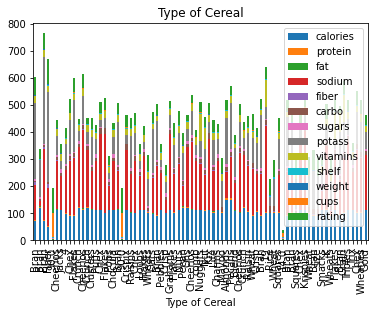

In [ ]:
df.plot.bar(x='Type of Cereal', stacked=True, title='Type of Cereal')

Question 9. (3 points)

Create a 3-dimensional scatterplot which shows the relationship between rating and calories; the 3-rd dimension should be reflected in the color of the dots and should highlight whether the cereal is categorized as healthy or unhealthy.

In [ ]:
df['Is Healthy1'] = df['Is Healthy'].apply(lambda x: 1 if x == 'Healthy' else 0)

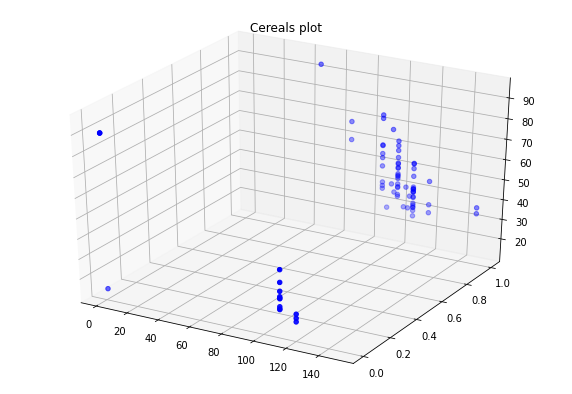

In [ ]:
import matplotlib.pyplot as plt
 
 
# Creating dataset
z = df['rating']
x = df['calories']
y = df['Is Healthy1']
 
# Creating figure
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
 
# Creating plot
ax.scatter3D(x, y, z, color = "blue")
plt.title("Cereals plot")
 
# show plot
plt.show()

Question 10. (1 point)

Which shelf has the most healthy cereals?

In [ ]:
df.groupby('Is Healthy')['shelf'].describe()

,count,mean,std,min,25%,50%,75%,max
Is Healthy,,,,,,,,
Healthy,62.0,2.287723,1.051322,1.0,1.279554,2.255639,3.0,6.0
Unhealthy,15.0,1.600000,0.507093,1.0,1.000000,2.000000,2.0,2.0
